In [ ]:
#import all packages
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from statsmodels.robust.scale import huber
import array as arr
from scipy.stats import cauchy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from scipy.stats import wilcoxon
from scipy import stats

from scipy.stats.mstats import winsorize

In [ ]:
#This is a very important package for running Sens Mean
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
#Random Cauchy variables for diseased population
rdiseased = cauchy.rvs(loc = 28, scale =1, size=100)
rdiseased

In [ ]:
#Random Cauchy variables for notdiseased population
rnotdiseased = cauchy.rvs(loc = 26.5, scale =1, size=100)
rnotdiseased

In [ ]:
#This reads the data file that will be upladed
df = pd.read_csv('Result2.csv')


In [ ]:
#Defining metric for Empirical ROC
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:
data= df
#define the predictor variables and the response variable
X = data[['Diseased', 'Not Diseased']]
y = data['Outcome']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

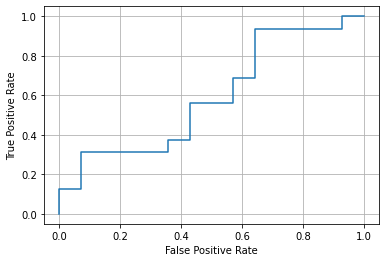

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

**HUBER ESTMATE**

(array(27.8619592), array(1.61339345))
1.1685528523623887


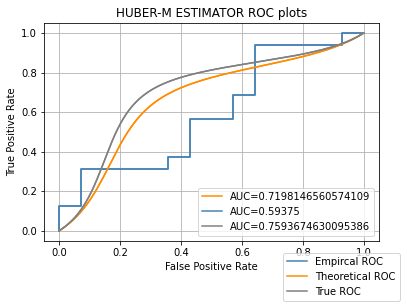

In [ ]:
#HUBER ESTIMATE COMPUTATION
import math
Huberdisease = huber(df['Diseased'])
Hubernotdisease = huber(df['Not Diseased'])
print(Huberdisease)

diff1 = Huberdisease[0] - Hubernotdisease[0]
print(diff1)

#define metrics

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = diff1;
t = np.linspace(0,1,1000)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))


y2 =  (28-26.5) + np.tan(x)
const2 = 1.5
z2 =  1/2 + 1/np.pi*np.arctan(y2)
#auc3 = np.trapz(z2,t)
auc3 = 1/2 + 1/np.pi*np.arctan(const2/math.sqrt(2))

#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("HUBER-M ESTIMATOR ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Theoretical ROC")
h33, = plt.plot(t,z2,color = 'grey',label="AUC="+str(auc3))
h3, = plt.plot(t,z2,color = 'grey', label="True ROC")

leg = plt.legend(handles=[h11,h22,h33], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1,h3], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()


**HODGES**


1.2160611324999948


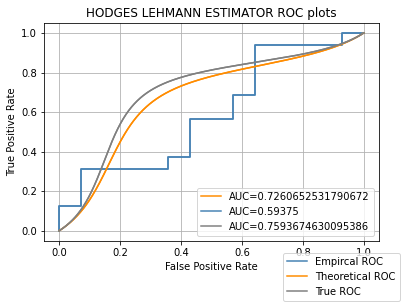

In [ ]:
#HODGES COMPUTATION
import statistics as stats
hL = [];
ard = ['Diseased','Not Diseased' ] 
for i in range(2):
  l_input = df[ard[i]];
  l_avgs = [];

  i = 0;
  j = 0;

  while i < len(l_input):
    while j < len(l_input):
      l_avgs.append(stats.mean([l_input[i], l_input[j]]))
      j = j + 1
    i = i + 1
    j = i
    
  hl_est = stats.median(l_avgs)
  hL.append(hl_est)

diff2 = hL[0] - hL[1] 
print(diff2) 



#Define Metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = diff2;
t = np.linspace(0,1,1000)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))

y2 =  (28-26.5) + np.tan(x)
const2 = 1.5
z2 =  1/2 + 1/np.pi*np.arctan(y2)
#auc3 = np.trapz(z2,t)
auc3 = 1/2 + 1/np.pi*np.arctan(const2/math.sqrt(2))

#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("HODGES LEHMANN ESTIMATOR ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Theoretical ROC")
h33, = plt.plot(t,z2,color = 'grey',label="AUC="+str(auc3))
h3, = plt.plot(t,z2,color = 'grey', label="True ROC")

leg = plt.legend(handles=[h11,h22,h33], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1,h3], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()



**5% Trimm Mean**

1.1767421185555627


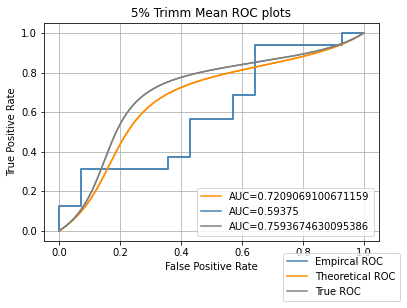

In [ ]:
#Trimm Mean Computation
from scipy import stats
pernt = 0.05
y = arr.array('d', [ stats.trim_mean(df['Diseased'], pernt),stats.trim_mean(df['Not Diseased'], pernt)])
difftrim5 = y[0]-y[1]
print(difftrim5)
diff3 = difftrim5



#Define Metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = difftrim5;
t = np.linspace(0,1,1000)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))

y2 =  (28-26.5) + np.tan(x)
conts2 = 1.5
z2 =  1/2 + 1/np.pi*np.arctan(y2)
#auc3 = np.trapz(z2,t)
auc3 = 1/2 + 1/np.pi*np.arctan(const2/math.sqrt(2))

#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("5% Trimm Mean ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Theoretical ROC")
h33, = plt.plot(t,z2,color = 'grey',label="AUC="+str(auc3))
h3, = plt.plot(t,z2,color = 'grey', label="True ROC")

leg = plt.legend(handles=[h11,h22,h33], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1,h3], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()



**10% Trimm Mean**

1.1716815149999995
26.69325161375


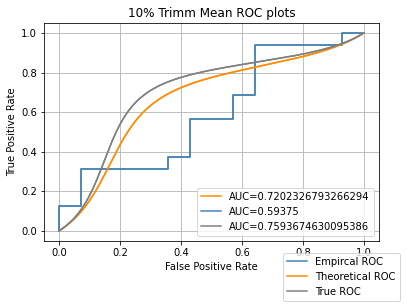

In [ ]:
#Trimm Mean Computation
pernt = 0.10
y = arr.array('d', [ stats.trim_mean(df['Diseased'], pernt),stats.trim_mean(df['Not Diseased'], pernt)])
difftrim10 = y[0]-y[1]
print(difftrim10)
diff4 = difftrim10
print(y[1])

#Define Metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = difftrim10;
t = np.linspace(0,1,1000)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))


y2 =  (28-26.5) + np.tan(x)
const2 = 1.5
z2 =  1/2 + 1/np.pi*np.arctan(y2)
#auc3 = np.trapz(z2,t)
auc3 = 1/2 + 1/np.pi*np.arctan(const2/math.sqrt(2))


#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("10% Trimm Mean ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Theoretical ROC")
h33, = plt.plot(t,z2,color = 'grey',label="AUC="+str(auc3))
h3, = plt.plot(t,z2,color = 'grey', label="True ROC")

leg = plt.legend(handles=[h11,h22,h33], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1,h3], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()



**5% Winsorized Mean**


1.1359174812000035


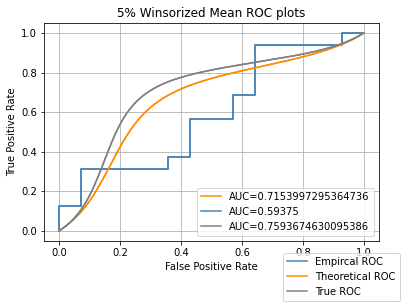

In [ ]:
#Winssorised mean computation
winsorizedarray_adep = winsorize(df['Not Diseased'], limits=[0.05, 0.05])
WinsorizedMean_adep = np.mean(winsorizedarray_adep)
winsorizedarray_obes = winsorize(df['Diseased'], limits=[0.05, 0.05])
WinsorizedMean_obes = np.mean(winsorizedarray_obes)
y1 = arr.array('d', [WinsorizedMean_obes,WinsorizedMean_adep])
Winn5 = y1[0]-y1[1]
print(Winn5)
diff5 = Winn5



#Define Metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = Winn5;
t = np.linspace(0,1,1000)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))


y2 =  (28-26.5) + np.tan(x)
const2 = 1.5
z2 =  1/2 + 1/np.pi*np.arctan(y2)
#auc3 = np.trapz(z2,t)
auc3 = 1/2 + 1/np.pi*np.arctan(const2/math.sqrt(2))


#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("5% Winsorized Mean ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Theoretical ROC")
h33, = plt.plot(t,z2,color = 'grey',label="AUC="+str(auc3))
h3, = plt.plot(t,z2,color = 'grey', label="True ROC")

leg = plt.legend(handles=[h11,h22,h33], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1,h3], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()




10% Winsorized Mean

1.2014686060000095
26.70797902499999


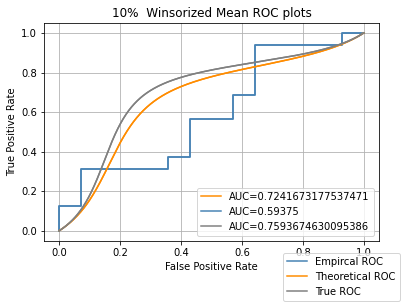

In [ ]:
#Winssorised mean computation
winsorizedarray_adep = winsorize(df['Not Diseased'], limits=[0.1, 0.1])
WinsorizedMean_adep = np.mean(winsorizedarray_adep)
winsorizedarray_obes = winsorize(df['Diseased'], limits=[0.1, 0.1])
WinsorizedMean_obes = np.mean(winsorizedarray_obes)
y1 = arr.array('d', [WinsorizedMean_obes,WinsorizedMean_adep])
Winn10 = y1[0]-y1[1]
print(Winn10)
diff6 = Winn10
print(y1[1])


#Define Metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = Winn10;
t = np.linspace(0,1,1000)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))


y2 =  (28-26.5) + np.tan(x)
const2 = 1.5
z2 =  1/2 + 1/np.pi*np.arctan(y2)
#auc3 = np.trapz(z2,t)
auc3 = 1/2 + 1/np.pi*np.arctan(const2/math.sqrt(2))


#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("10%  Winsorized Mean ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Theoretical ROC")
h33, = plt.plot(t,z2,color = 'grey',label="AUC="+str(auc3))
h3, = plt.plot(t,z2,color = 'grey', label="True ROC")

leg = plt.legend(handles=[h11,h22,h33], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1,h3], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()




**SENS WEIGHTED MEAN**

In [ ]:
%%R
install.packages("lmomco")
library("lmomco")

df <- read.csv(file = 'Both.csv')

sen1 <- sen.mean(df[1]);
sen2 <- sen.mean(df[2]);

#   list1 <- append(list1, sen)
x <- c(sen1,sen2)

print(x)



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/lmomco_2.3.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1149712 bytes (1.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

$sen
[1] 27.87913

$source
[1] "sen.mean"

$sen
[1] 26.80403

$source
[1] "sen.mean"



1.075099999999999


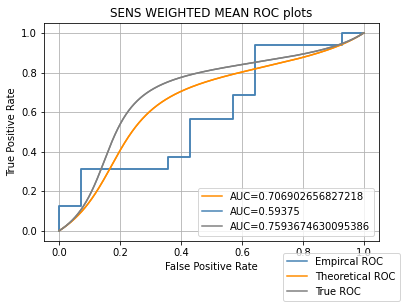

In [ ]:
diffsen = 27.87913- 26.80403
print(diffsen)
diff7 = diffsen
#Define Metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = diffsen;
t = np.linspace(0,1,1000)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))

y2 =  (28-26.5) + np.tan(x)
const2 = 1.5
z2 =  1/2 + 1/np.pi*np.arctan(y2)
#auc3 = np.trapz(z2,t)
auc3 = 1/2 + 1/np.pi*np.arctan(const2/math.sqrt(2))

#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("SENS WEIGHTED MEAN ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Theoretical ROC")
h33, = plt.plot(t,z2,color = 'grey',label="AUC="+str(auc3))
h3, = plt.plot(t,z2,color = 'grey', label="True ROC")

leg = plt.legend(handles=[h11,h22,h33], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1,h3], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()




**MEAN**

1.075101221599997
[26.804028035899996, 27.879129257499994]


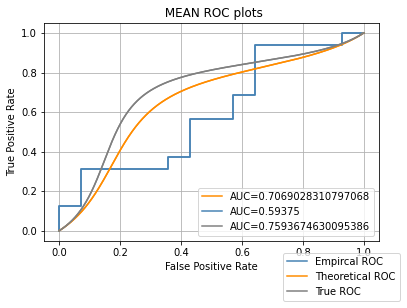

In [ ]:
# Computation of mean
mean_1 = np.mean(df['Not Diseased'])
mean_2 = np.mean(df['Diseased'])
mean = [mean_1,mean_2]
mean

diffmean = mean[1]-mean[0]
print(diffmean)
diff8 = diffmean
print( mean)

#Define Metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = diffmean;
t = np.linspace(0,1,1000)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))

y2 =  (28-26.5) + np.tan(x)
const2 = 1.5
z2 =  1/2 + 1/np.pi*np.arctan(y2)
#auc3 = np.trapz(z2,t)
auc3 = 1/2 + 1/np.pi*np.arctan(const2/math.sqrt(2))

#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title(" MEAN ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Theoretical ROC")
h33, = plt.plot(t,z2,color = 'grey',label="AUC="+str(auc3))
h3, = plt.plot(t,z2,color = 'grey', label="True ROC")

leg = plt.legend(handles=[h11,h22,h33], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1,h3], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()

**PLOTS OF ALL ESTIMATORS**

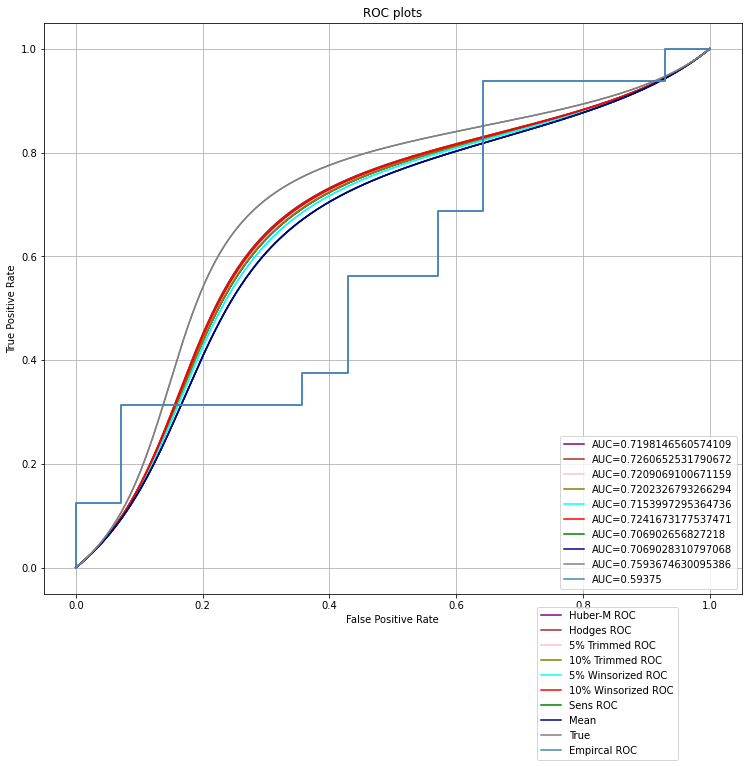

In [ ]:
const = [diff1,diff2,diff3,diff4,diff5,diff6,diff7,diff8,const2]
estimates = ['Huber-M ROC', 'Hodges ROC', '5% Trimmed ROC', '10% Trimmed ROC','5% Winsorized ROC','10% Winsorized ROC', 'Sens ROC', 'Mean',"True"]
colors = ['purple','brown','pink', 'olive','cyan','red','green','darkblue','grey','darkcyan']
col_count = 0
t = np.linspace(0,1,1000)
ct = []
ct2 = []

x = np.pi*t - np.pi/2
for i in const:
  y = i + np.tan(x)
  z = 1/2 + 1/np.pi*np.arctan(y)
  auc2 = 1/2 + 1/np.pi*np.arctan(i/math.sqrt(2))
  globals()[f"h1_{col_count}"], = plt.plot(t,z,color = colors[col_count],label="AUC="+str(auc2))
  globals()[f"h2_{col_count}"], = plt.plot(t,z,color = colors[col_count], label=estimates[col_count])
  ct.append(globals()[f"h1_{col_count}"],)
  ct2.append(globals()[f"h2_{col_count}"],)
  col_count = col_count + 1




#h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
#h1, = plt.plot(t,z,color = 'darkorange', label="Bi-Cauchy ROC")


#create ROC curve
h32, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h3, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))

ct.append(h32)
ct2.append(h3)
leg = plt.legend(handles=ct, loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=ct2, loc=3, bbox_to_anchor=(0.7,-0.3))
fig = plt.gcf()
fig.set_size_inches(12.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.grid()
plt.show()

